# US Accidents Dataset - Initial Loading and Exploration

**Objective**: Load the US Accidents dataset and perform initial exploration to understand the data structure, quality, and key characteristics.

**Dataset**: US Accidents (2016-2023)
- Source: Kaggle (sobhanmoosavi/us-accidents)
- Size: 2.9 GB, 7.7M+ records, 46 columns
- Geographic Coverage: 49 US states

## Notebook Contents
1. Environment Setup
2. Data Loading
3. Basic Statistics
4. Data Quality Assessment
5. Geographic Coverage
6. Temporal Patterns
7. Severity Distribution
8. Initial Findings

## 1. Environment Setup

In [27]:
# Import required libraries
from enum import IntEnum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from pathlib import Path
import sys

print("✓ Required packages imported")

✓ Required packages imported


In [44]:
# Add project root to path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

from config import Config

# Setup
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Environment setup complete")
print(f"Project root: {project_root}")

✓ Environment setup complete
Project root: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project


## 2. Data Loading

Let's load the dataset. We initially define optimized datatypes for improved storage & processing

In [46]:
# Show file sizes
fars_csv_names = ["accident", "drugs", "person"]
class FARS_DATA_INDEX(IntEnum):
    ACCIDENT = 0
    DRUGS = 1
    PERSON = 2
years = [2018, 2019, 2023]

for year in years:
    for filename in fars_csv_names:
        data_path = Config.FARS_RAW_DIR / f"{year}/{filename}.csv"
        print(f"{str(data_path)} file size: {data_path.stat().st_size / 1024**3:.2f} GB")

/Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2018/accident.csv file size: 0.02 GB
/Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2018/drugs.csv file size: 0.01 GB
/Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2018/person.csv file size: 0.08 GB
/Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2019/accident.csv file size: 0.02 GB
/Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2019/drugs.csv file size: 0.01 GB
/Users/amadeusrieck/Library/

In [47]:
# Define optimized data types
dtype_dict = {
    'ST_CASE': 'int32',
    'STATENAME': 'category',
    'PEDS': 'int16',
    'PERNOTMVIT': 'int16',
    'VE_TOTAL': 'int16',
    'VE_FORMS': 'int16',
    'PVH_INVL': 'int16',
    'PERSONS': 'int16',
    'PERMVIT': 'int16',
    'COUNTYNAME': 'string',
    'MONTH': 'int8',
    'DAY': 'int8',
    'DAY_WEEKNAME': 'category',
    'YEAR': 'int16',
    'HOUR': 'int8',
    'MINUTE': 'int8',
    'TWAY_ID': 'string',
    'ROUTENAME': 'string',
    'RUR_URBNAME': 'category',
    'FUNC_SYSNAME': 'string',#'category',
    'RD_OWNERNAME': 'category',
    'NHSNAME': 'category',
    'SP_JURNAME': 'category',
    'HARM_EVNAME': 'category',
    'MAN_COLLNAME': 'string',#'category',
    'RELJCT2NAME': 'category',
    'TYP_INTNAME': 'category',
    'REL_ROADNAME': 'category',
    'WRK_ZONE': 'category',
    'LGT_CONDNAME': 'category',
    'WEATHERNAME': 'category',
    'SCH_BUS': 'boolean',
    'RAIL': 'string',
    'NOT_HOUR': 'int8',
    'NOT_MIN': 'int8',
    'ARR_HOUR': 'int8',
    'ARR_MIN': 'int8',
    'HOSP_HR': 'int8',
    'HOSP_MN': 'int8',
    'FATALS': 'int16',
    'DRUGRESNAME': 'string',#'category',
    'AGE': 'int8',
    'PER_TYPNAME': 'category',
    'INJ_SEV': 'int8',
    'ALC_RES': 'int16',
}

print("Data type optimization configured")
print(f"Categorical columns: {sum(1 for v in dtype_dict.values() if v == 'category')}")
print(f"Boolean columns: {sum(1 for v in dtype_dict.values() if v == 'bool')}")
print(f"Float32 columns: {sum(1 for v in dtype_dict.values() if v == 'float32')}")

# Load the raw data
fars_data = [[pd.DataFrame() for _ in range(len(fars_csv_names))] for _ in range(len(years))]
for i, year in enumerate(years):
    for j, filename in enumerate(fars_csv_names):
        data_path = Config.FARS_RAW_DIR / f"{year}/{filename}.csv"
        fars_data[i][j] = pd.read_csv(data_path, dtype=dtype_dict, sep=',', encoding='ISO-8859-1')
        print(f"\n✓ Dataset loaded: {data_path} {len(fars_data[i][j]):,} rows × {len(fars_data[i][j].columns)} columns")

Data type optimization configured
Categorical columns: 14
Boolean columns: 0
Float32 columns: 0

✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2018/accident.csv 33,919 rows × 91 columns

✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2018/drugs.csv 99,097 rows × 9 columns


/var/folders/rm/1pg6vmyx03xb5c57p_13gf600000gn/T/ipykernel_27169/3426989161.py:60: DtypeWarning: Columns (15,109) have mixed types. Specify dtype option on import or set low_memory=False.
  fars_data[i][j] = pd.read_csv(data_path, dtype=dtype_dict, sep=',', encoding='ISO-8859-1')



✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2018/person.csv 84,344 rows × 118 columns

✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2019/accident.csv 33,487 rows × 91 columns

✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2019/drugs.csv 98,899 rows × 9 columns


/var/folders/rm/1pg6vmyx03xb5c57p_13gf600000gn/T/ipykernel_27169/3426989161.py:60: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  fars_data[i][j] = pd.read_csv(data_path, dtype=dtype_dict, sep=',', encoding='ISO-8859-1')
/var/folders/rm/1pg6vmyx03xb5c57p_13gf600000gn/T/ipykernel_27169/3426989161.py:60: DtypeWarning: Columns (15,106,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fars_data[i][j] = pd.read_csv(data_path, dtype=dtype_dict, sep=',', encoding='ISO-8859-1')



✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2019/person.csv 82,843 rows × 119 columns

✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2023/accident.csv 37,654 rows × 80 columns

✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2023/drugs.csv 129,629 rows × 17 columns

✓ Dataset loaded: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/raw/fars/2023/person.csv 92,400 rows × 126 columns


In [48]:
# Keep only columns of interest/drop unimportant columns
# This will probably be replaced by something determined by PCA
fars_accident_cols = [
    'ST_CASE', 'STATENAME', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT',
    'COUNTYNAME', 'MONTH', 'DAY', 'DAY_WEEKNAME', 'YEAR', 'HOUR', 'MINUTE', 'TWAY_ID', 'ROUTENAME',
    'RUR_URBNAME', 'FUNC_SYSNAME', 'RD_OWNERNAME', 'NHSNAME', 'SP_JURNAME', 'HARM_EVNAME',
    'MAN_COLLNAME', 'RELJCT2NAME', 'TYP_INTNAME', 'REL_ROADNAME', 'WRK_ZONE', 'LGT_CONDNAME', 'WEATHERNAME',
    'SCH_BUSNAME', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'FATALS'
    ]
fars_drugs_cols = ['ST_CASE', 'PER_NO', 'DRUGRESNAME']
fars_person_cols = ['ST_CASE', 'PER_NO', 'AGE', 'PER_TYP', 'INJ_SEV', 'ALC_RES', 'DRINKING'] # added DRINKING var
fars_col_subsets = [fars_accident_cols, fars_drugs_cols, fars_person_cols]
for i, year in enumerate(years):
    for j, fars_col_subset in enumerate(fars_col_subsets):
        print(f"Dropping unwanted columns from {fars_csv_names[j]}:")
        fars_data[i][j] = fars_data[i][j][fars_col_subset]
        print(f"\n✓ Columns dropped, new dataset shape is: {len(fars_data[i][j]):,} rows × {len(fars_data[i][j].columns)} columns")

Dropping unwanted columns from accident:

✓ Columns dropped, new dataset shape is: 33,919 rows × 40 columns
Dropping unwanted columns from drugs:

✓ Columns dropped, new dataset shape is: 99,097 rows × 3 columns
Dropping unwanted columns from person:

✓ Columns dropped, new dataset shape is: 84,344 rows × 7 columns
Dropping unwanted columns from accident:

✓ Columns dropped, new dataset shape is: 33,487 rows × 40 columns
Dropping unwanted columns from drugs:

✓ Columns dropped, new dataset shape is: 98,899 rows × 3 columns
Dropping unwanted columns from person:

✓ Columns dropped, new dataset shape is: 82,843 rows × 7 columns
Dropping unwanted columns from accident:

✓ Columns dropped, new dataset shape is: 37,654 rows × 40 columns
Dropping unwanted columns from drugs:

✓ Columns dropped, new dataset shape is: 129,629 rows × 3 columns
Dropping unwanted columns from person:

✓ Columns dropped, new dataset shape is: 92,400 rows × 7 columns


## 3. Joining FARS datasets

In [49]:
# Missing values analysis
# TODO personrf has indications of whether or not a drug/alcohol test was refused
missing = pd.DataFrame({
        'Column': [],
        'Missing_Count': [],
        'Missing_Percentage': []
    })

remap_vals = {
    'ROUTENAME': {
        'County': 'County Road',
        'Township': 'Local Street - Township',
        'Municipal': 'Local Street - Municipality',
        'Local Street - Frontage Road': 'Other',
        'Parkway Marker or Forest Route Marker [Specify:]': 'Other',
        'Off-Interstate Business Marker': 'Other',
        'Secondary Route': 'Other',
        'Bureau of Indian Affairs': 'Other'
        },
    'FUNC_SYSNAME': {
        'Other Freeways and Expressways': 'Principal Arterial - Other Freeways and Expressways',
        'Other Principal Arterial': 'Principal Arterial - Other'
        },
    'MAN_COLLNAME': {
        'First Harmful Event was Not a Collision with Motor Vehicle In-Transport': 'Not a Collision with Motor Vehicle In-Transport'
        },
    'DRUGRESNAME': {
        'Narcotic Analgesics': 'Narcotics',
    #    'Phencyclidine (PCP)': 'Other Drug (Specify:)',        # keep as it is for positive_keywords
    #    'Dissociative Anesthetics': 'Other Drug (Specify:)',   # keep as it is for positive_keywords
        'Non-Psychoactive/Other Drugs': 'None Detected/Below Threshold',
    }
}

missing_vals = {
    'HOUR': [99],
    'MINUTE': [99],
    'TWAY_ID': [999999999999999999999999999999],
    'ROUTENAME': ['Unknown/Not Reported', 'Trafficway Not in State Inventory', 'Unknown'], #Changes 2023
    'RUR_URBNAME': [6, 8, 9],
    'FUNC_SYSNAME': [96, 98, 99], #Changes 2023
    'RD_OWNERNAME': [96, 98, 99],
    'NHSNAME': [9],
    'SP_JURNAME': [9],
    'HARM_EVNAME': ['Reported as Unknown'],
    'MAN_COLLNAME': ['Unknown'], #Changes 2019
    'RELJCT2NAME': ['Reported as Unknown', 'Not Reported'],
    'TYP_INTNAME': ['Reported as Unknown', 'Not Reported'], #Change 2020
    'REL_ROADNAME': ['Reported as Unknown', 'Not Reported'],
    'LGT_CONDNAME': ['Other', 'Not Reported', 'Reported as Unknown'],
    'WEATHERNAME': ['Not Reported', 'Unknown', 'Reported as Unknown'],
    'RAIL': ['9999999'],
    'NOT_HOUR': [88, 99],
    'NOT_MIN': [88, 98, 99],
    'DRUGRESNAME': ['Reported as Unknown if Tested for Drugs', 'Tested for Drugs, Results Unknown', 'Not Reported'], #Changes 2022
    'ALC_RES': [999], #Needs more than just dealing with missing values
    'INJ_SEV': [9],
    'AGE': [99] #97 or older are all recorded as 97
}

for i, year in enumerate(years):
    for j, dataset in enumerate(fars_data[i]):
        for column in dataset:
            if column in remap_vals:
                for value in remap_vals[column]:
                    dataset.loc[dataset[column] == value, column] = remap_vals[column][value]

            if column in missing_vals:
                for value in missing_vals[column]:
                    dataset.loc[dataset[column] == value, column] = None

print("Remapped non-missing values & replaced missing values")

for i, dataset in enumerate(fars_data[0]):
    for column in dataset:
        missing_count = sum([fars_data[j][i][column].isna().sum() for j in range(len(fars_data))])
        total_count = sum([len(fars_data[j][i][column]) for j in range(len(fars_data))])
        new_missing_frame = pd.DataFrame({
            'Column': [f"{fars_csv_names[i]}.{column}"],
            'Missing_Count': [missing_count],
            'Missing_Percentage': [((missing_count / total_count) * 100).round(2)]
        })
        missing = pd.concat([missing, new_missing_frame])

missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(f"Columns with missing values: {len(missing)} out of {sum([len(dataset.columns) for dataset in fars_data[0]])}")
print("\nColumns with missing data:")
missing = missing.reset_index(drop=True)
display(missing)

Remapped non-missing values & replaced missing values
Columns with missing values: 17 out of 50

Columns with missing data:


,Column,Missing_Count,Missing_Percentage
0,accident.NOT_MIN,56757.00,54.02
1,accident.NOT_HOUR,55546.00,52.87
2,drugs.DRUGRESNAME,32504.00,9.92
3,accident.WEATHERNAME,6574.00,6.26
4,accident.ROUTENAME,4737.00,4.51
5,person.INJ_SEV,3647.00,1.40
6,accident.HOUR,752.00,0.72
7,accident.MINUTE,753.00,0.72
8,person.ALC_RES,1844.00,0.71
9,accident.LGT_CONDNAME,691.00,0.66


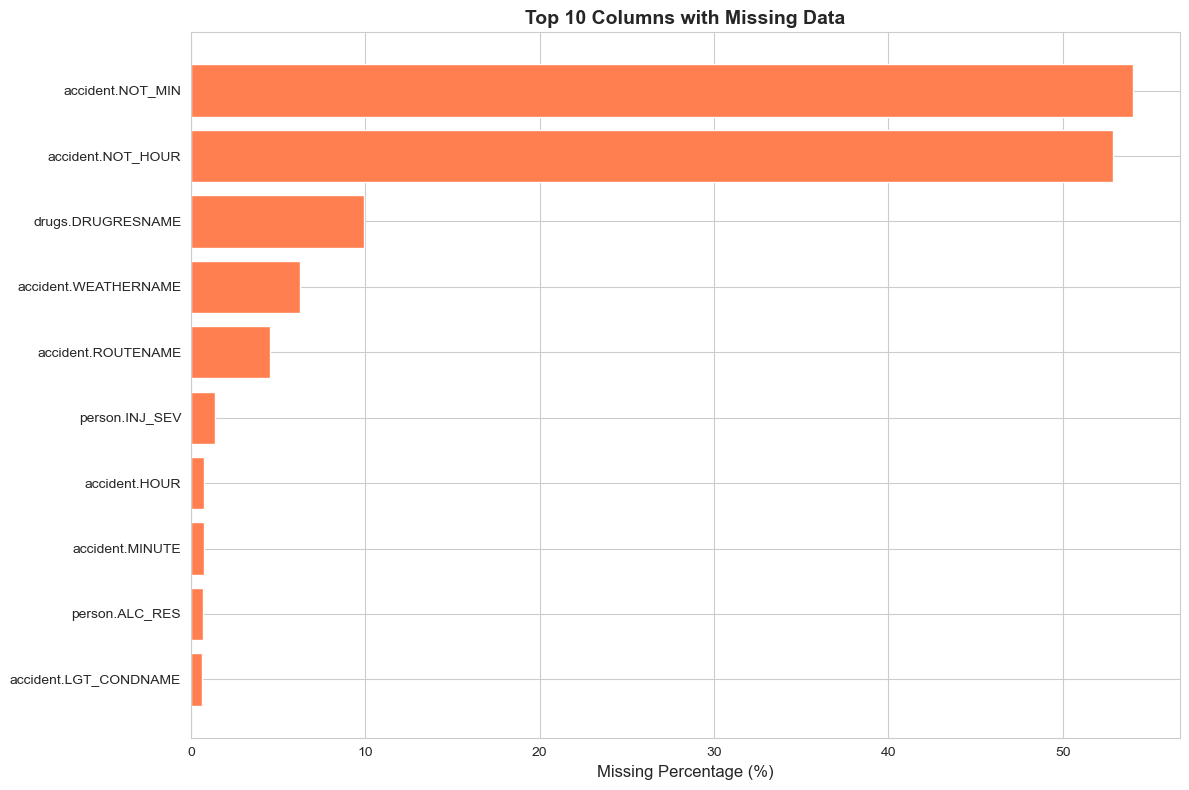

In [55]:
# Visualize missing data
fig, ax = plt.subplots(figsize=(12, 8))
missing_top = missing.head(10)
ax.barh(missing_top['Column'], missing_top['Missing_Percentage'], color='coral')
ax.set_xlabel('Missing Percentage (%)', fontsize=12)
ax.set_title('Top 10 Columns with Missing Data', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [52]:
# NEW HELPER FUNCTIONS FOR IMPAIRMENT

def alcohol_positive(bac, drinking):
    """
    Determine if alcohol involvement is present.
    Conditions:
    - DRINKING == 1 → definite alcohol involvement
    - BAC > 80 (i.e., >0.08%) AND BAC not in special missing codes
    """
    # DRINKING directly indicates alcohol involvement
    if drinking == 1:
        return True

    # BAC special codes (missing / unknown)
    if bac in [995, 996, 997, 998, 999, None]:
        return False
    
    # Actual BAC value
    try:
        if bac is not None and bac > 80:  # 80 = 0.08% legal threshold
            return True
    except:
        pass
    
    return False


def drug_positive(drug_name):
    """
    Detect if drug involvement is present.
    Conservative rules:
    - Negative / missing categories are NOT positive
    - Only substance classes are considered positive
    """

    if pd.isna(drug_name):
        return False
    
    dn = str(drug_name).lower()

    # Negative or missing categories
    negative_terms = [
        "none detected",
        "below threshold",
        "test not given",
        "not reported",
        "unknown",
        "refused",
        "results unknown",
        "tested for drugs, results unknown",
        "reported as unknown",
        "reported as unknown if tested for drugs",
        "tested for drugs, drugs detected, type unknown/positive"
    ]
    if any(n in dn for n in negative_terms):
        return False

    # --- Cannabis ---
    cannabis = ["thc", "cannabin", "marij"]

    # --- Amphetamines ---
    amphetamines = ["amphetamine", "methamphetamine", "amph"]

    # --- Cocaine & metabolites ---
    cocaine = ["cocain", "ecgon", "ethylbenzoy"]

    # --- Opioids / narcotics ---
    opioids = ["fent", "codon", "morph", "oxy", "narcotic"]

    # --- Benzodiazepines ---
    benzos = ["zepam", "zolam", "benzodiaz"]

    # --- Other hallucinogens / dissociatives ---
    hallucinogens = ["pcp", "ketamine", "mdma"]

    positive_groups = (
        cannabis + amphetamines + cocaine + opioids + benzos + hallucinogens
    )

    return any(term in dn for term in positive_groups)

In [53]:
new_cols = ['TOTAL_HARM', 'ALCOHOL_DRIVER_INVOLVED', 'DRUG_DRIVER_INVOLVED', 'INTOXICATED_DRIVER_INVOLVED']
columns = fars_accident_cols + new_cols

joined_years_data = []

for i, datasets in enumerate(fars_data):
    joined_year_data = datasets[FARS_DATA_INDEX.ACCIDENT].copy()
    for col in new_cols:
        joined_year_data[col] = pd.NA

    for j, accident in datasets[FARS_DATA_INDEX.ACCIDENT].iterrows():
        num_persons = accident['PERSONS']
        person_row_number = datasets[FARS_DATA_INDEX.PERSON].index[
            datasets[FARS_DATA_INDEX.PERSON]['ST_CASE'] == accident['ST_CASE']
        ][0]
        drugs_row_number = datasets[FARS_DATA_INDEX.DRUGS]['ST_CASE'].index[
            datasets[FARS_DATA_INDEX.DRUGS]['ST_CASE'] == accident['ST_CASE']
        ][0]

        alcohol_flag = False
        drug_flag = False

        for column in new_cols:
            # ----- TOTAL HARM -----
            if column == new_cols[0]:
                total_harm = 0
                for k in range(num_persons):
                    person_harm = datasets[FARS_DATA_INDEX.PERSON].loc[person_row_number + k, 'INJ_SEV']
                    if person_harm <= 4:
                        total_harm += person_harm
                    elif person_harm == 5:
                        total_harm += 1
                joined_year_data.loc[j, column] = total_harm

            # ----- INTOXICATION -----
            elif column == new_cols[3]:
                for k in range(num_persons):
                    person_row = datasets[FARS_DATA_INDEX.PERSON].iloc[person_row_number + k]

                    if person_row['PER_TYP'] != 1:
                        continue  # only drivers

                    bac = person_row['ALC_RES']
                    drinking = person_row.get('DRINKING', None)
                    driver_no = person_row['PER_NO']

                    # Alcohol
                    if alcohol_positive(bac, drinking):
                        alcohol_flag = True

                    # Drugs
                    drugs_idx = drugs_row_number
                    while drugs_idx < len(datasets[FARS_DATA_INDEX.DRUGS]):
                        drugs_row = datasets[FARS_DATA_INDEX.DRUGS].iloc[drugs_idx]

                        if drugs_row['ST_CASE'] != accident['ST_CASE']:
                            break

                        if drugs_row['PER_NO'] == driver_no:
                            if drug_positive(drugs_row['DRUGRESNAME']):
                                drug_flag = True
                                break

                        drugs_idx += 1

                    if alcohol_flag or drug_flag:
                        break  # stop scanning persons

                joined_year_data.loc[j, 'ALCOHOL_DRIVER_INVOLVED'] = alcohol_flag
                joined_year_data.loc[j, 'DRUG_DRIVER_INVOLVED'] = drug_flag
                joined_year_data.loc[j, 'INTOXICATED_DRIVER_INVOLVED'] = alcohol_flag or drug_flag

    joined_years_data.append(joined_year_data)

joined_data = pd.concat(joined_years_data)
display(joined_data.head())

,ST_CASE,STATENAME,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,COUNTYNAME,MONTH,DAY,DAY_WEEKNAME,YEAR,HOUR,MINUTE,TWAY_ID,ROUTENAME,RUR_URBNAME,FUNC_SYSNAME,RD_OWNERNAME,NHSNAME,SP_JURNAME,HARM_EVNAME,MAN_COLLNAME,RELJCT2NAME,TYP_INTNAME,REL_ROADNAME,WRK_ZONE,LGT_CONDNAME,WEATHERNAME,SCH_BUSNAME,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,FATALS,TOTAL_HARM,ALCOHOL_DRIVER_INVOLVED,DRUG_DRIVER_INVOLVED,INTOXICATED_DRIVER_INVOLVED
0,10001,Alabama,0,0,2,1,1,1,1,TALLADEGA (121),1,5,Friday,2018,6.00,0.00,I-20,Interstate,Rural,Interstate,State Highway Agency,This section IS ON the NHS,No Special Jurisdiction,Parked Motor Vehicle,Not a Collision with Motor Vehicle In-Transport,Non-Junction,Not an Intersection,On Shoulder,0,Dawn,Clear,No,0000000,6.00,NaN,6,15,88,88,1,4.00,False,False,False
1,10002,Alabama,0,0,1,1,0,2,2,WALKER (127),1,8,Monday,2018,0.00,48.00,I-22,Interstate,Urban,Interstate,State Highway Agency,This section IS ON the NHS,No Special Jurisdiction,Fence,Not a Collision with Motor Vehicle In-Transport,Other location within Interchange Area,Not an Intersection,On Median,0,Dark - Not Lighted,Rain,No,0000000,0.00,NaN,0,59,88,88,2,8.00,False,False,False
2,10003,Alabama,0,0,2,2,0,2,2,CHILTON (21),1,8,Monday,2018,22.00,50.00,I-65,Interstate,Rural,Interstate,State Highway Agency,This section IS ON the NHS,No Special Jurisdiction,Guardrail Face,Not a Collision with Motor Vehicle In-Transport,Non-Junction,Not an Intersection,On Roadside,1,Dark - Not Lighted,Cloudy,No,0000000,NaN,NaN,23,10,99,99,1,6.00,False,True,True
3,10004,Alabama,0,0,1,1,0,2,2,BALDWIN (3),1,9,Tuesday,2018,13.00,2.00,I-65,Interstate,Rural,Interstate,State Highway Agency,This section IS ON the NHS,No Special Jurisdiction,Guardrail Face,Not a Collision with Motor Vehicle In-Transport,Non-Junction,Not an Intersection,On Roadside,0,Daylight,Cloudy,No,0000000,13.00,NaN,13,14,88,88,1,4.00,False,False,False
4,10005,Alabama,0,0,2,2,0,2,2,JEFFERSON (73),1,19,Friday,2018,7.00,9.00,I-459,Interstate,Urban,Interstate,State Highway Agency,This section IS ON the NHS,No Special Jurisdiction,Motor Vehicle In-Transport,Front-to-Rear,Non-Junction,Not an Intersection,On Roadway,0,Daylight,Clear,No,0000000,7.00,NaN,7,28,88,88,1,6.00,False,False,False


## 4. Geographic Coverage

In [33]:
# State distribution
state_counts = joined_data['STATENAME'].value_counts().head(15)
print("Top 15 States by fatal accident Count:")
print("=" * 40)
for state, count in state_counts.items():
    pct = (count / len(joined_data)) * 100
    print(f"{state:10s} {count:>10,}  ({pct:5.2f}%)")

Top 15 States by fatal accident Count:
California     10,639  (10.13%)
Texas          10,481  ( 9.98%)
Florida         9,052  ( 8.62%)
Georgia         4,277  ( 4.07%)
North Carolina      4,128  ( 3.93%)
Tennessee       3,233  ( 3.08%)
Pennsylvania      3,226  ( 3.07%)
Ohio            3,185  ( 3.03%)
Illinois        3,032  ( 2.89%)
Arizona         3,021  ( 2.88%)
South Carolina      2,872  ( 2.73%)
Michigan        2,830  ( 2.69%)
New York        2,822  ( 2.69%)
Alabama         2,625  ( 2.50%)
Missouri        2,572  ( 2.45%)


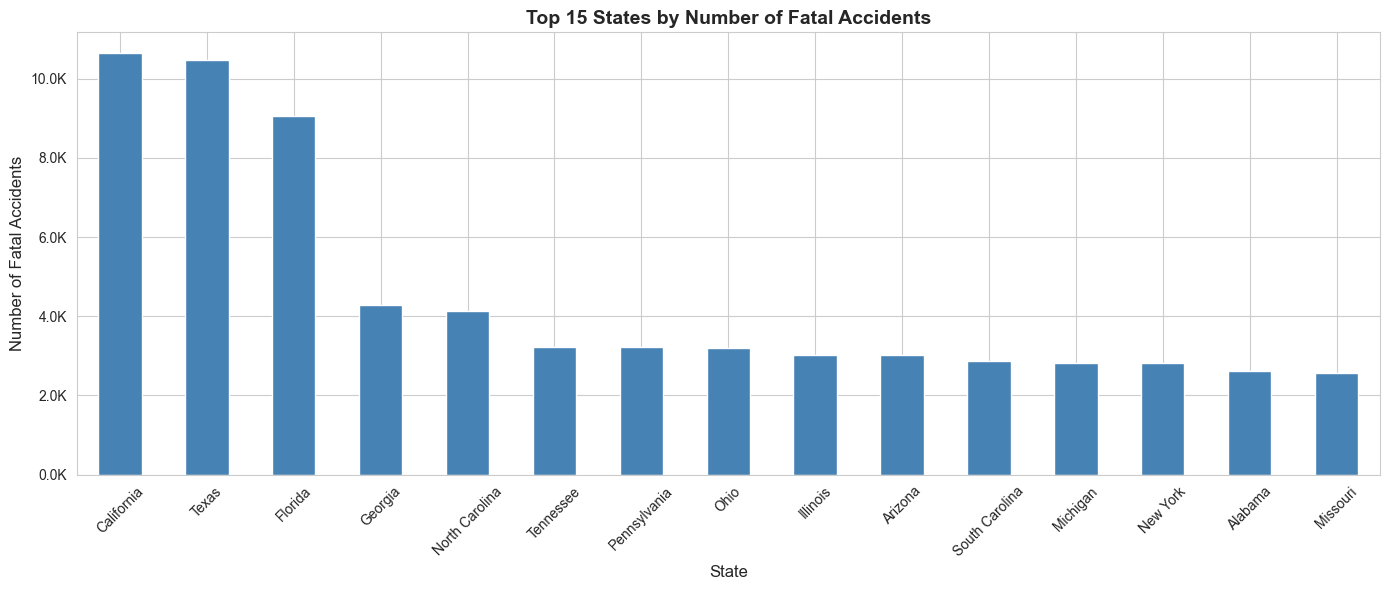

In [34]:
# Visualize state distribution
fig, ax = plt.subplots(figsize=(14, 6))
state_counts.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Top 15 States by Number of Fatal Accidents', fontsize=14, fontweight='bold')
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Fatal Accidents', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{float(x/1000)}K'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Temporal Patterns

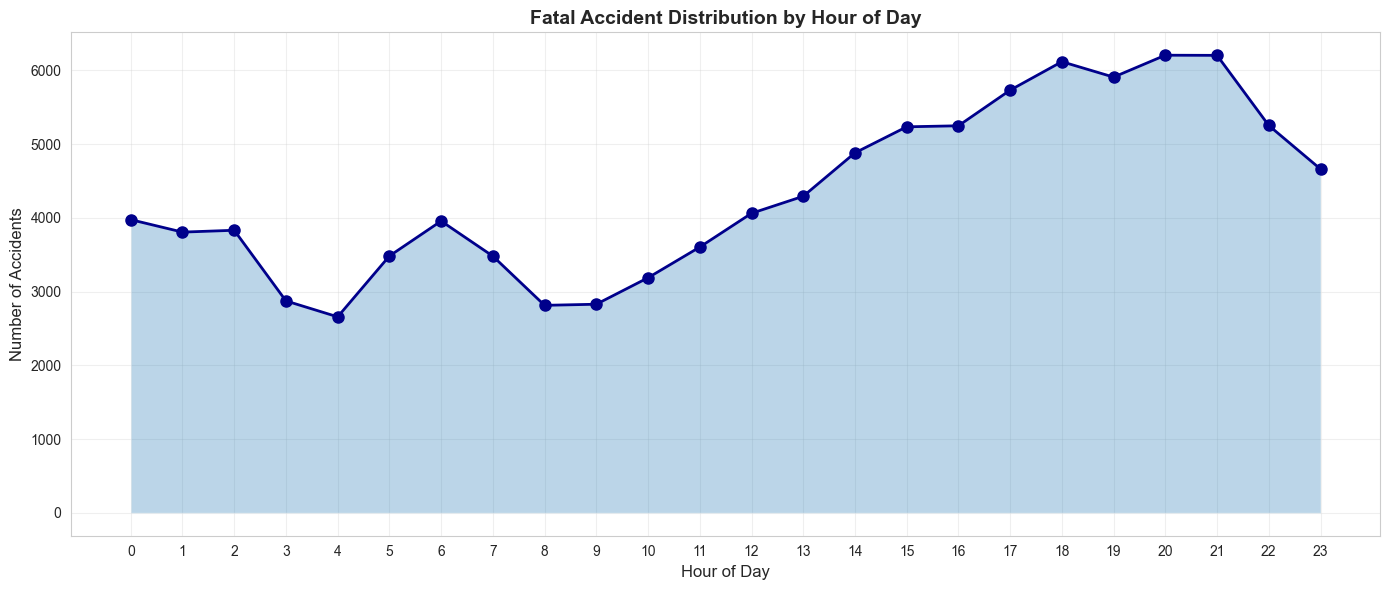

In [35]:
# Accidents by hour of day
hour_counts = joined_data['HOUR'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, markersize=8, color='darkblue')
ax.fill_between(hour_counts.index, hour_counts.values, alpha=0.3)
ax.set_title('Fatal Accident Distribution by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()

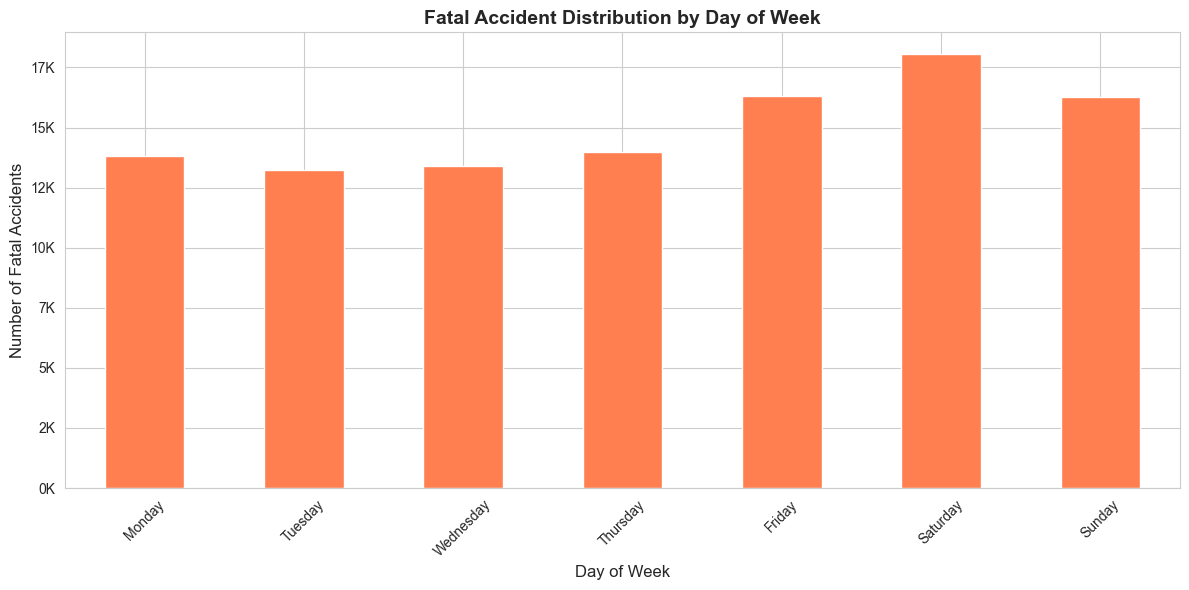

In [36]:
# Accidents by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = joined_data['DAY_WEEKNAME'].value_counts().reindex(day_order)

fig, ax = plt.subplots(figsize=(12, 6))
day_counts.plot(kind='bar', ax=ax, color='coral')
ax.set_title('Fatal Accident Distribution by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Number of Fatal Accidents', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** The weekend has a higher number of fatal accidents compared to working days, let's dive into the hourly distribution on weekends to see why

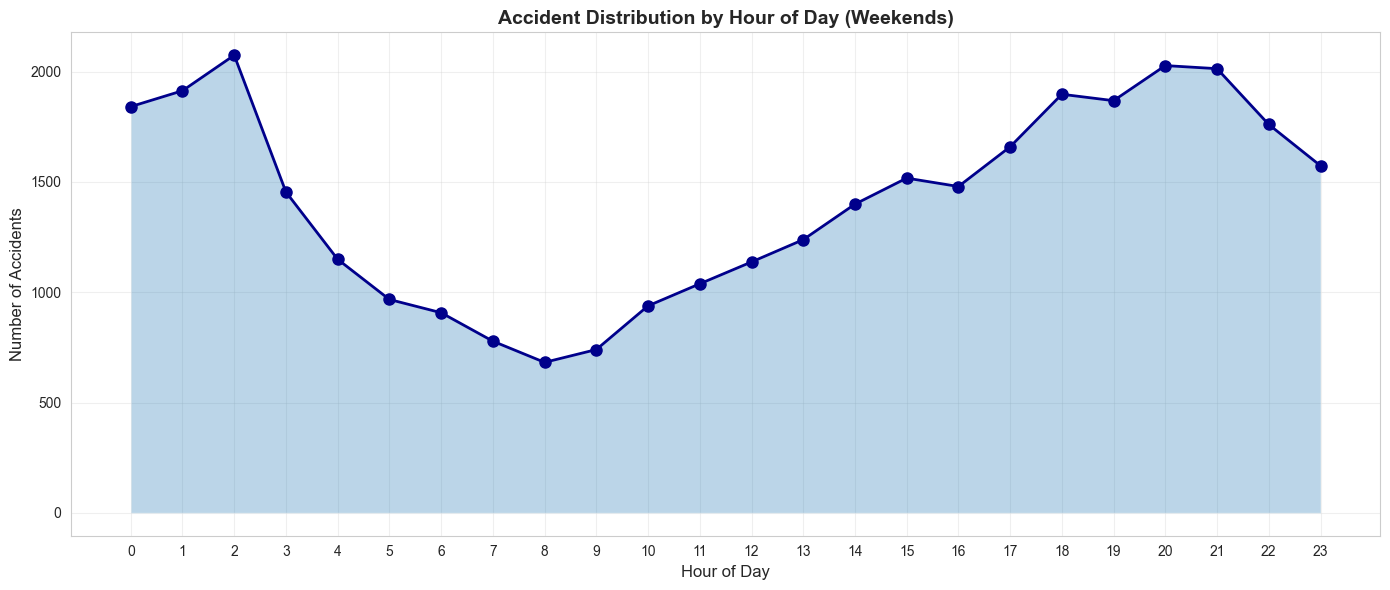


Top 10 Peak Hours for Accidents:

At 02h: 2,074 accidents (3.04x minimum)
At 20h: 2,027 accidents (2.97x minimum)
At 21h: 2,013 accidents (2.95x minimum)
At 01h: 1,913 accidents (2.80x minimum)
At 18h: 1,897 accidents (2.78x minimum)
At 19h: 1,868 accidents (2.74x minimum)
At 00h: 1,841 accidents (2.70x minimum)
At 22h: 1,760 accidents (2.58x minimum)
At 17h: 1,659 accidents (2.43x minimum)
At 23h: 1,573 accidents (2.31x minimum)

Minimum Accidents in a Single Hour (weekends): 682 accidents


In [37]:
# Accidents by hour of day on weekends

hour_counts = joined_data[joined_data['DAY_WEEKNAME'].isin(['Saturday', 'Sunday'])]['HOUR'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, markersize=8, color='darkblue')
ax.fill_between(hour_counts.index, hour_counts.values, alpha=0.3)
ax.set_title('Accident Distribution by Hour of Day (Weekends)', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Identify the peak hours for accidents

min_accidents = hour_counts.min()
peak_hours = hour_counts.sort_values(ascending=False).head(10)

print("\nTop 10 Peak Hours for Accidents:\n")
for hour, count in peak_hours.items():
    print(f"At {int(hour):02d}h: {count:,} accidents ({count/min_accidents:.2f}x minimum)")  

print(f"\nMinimum Accidents in a Single Hour (weekends): {min_accidents:,} accidents")

**Observation:** The rush hour patterns are less pronounced on weekends compared to weekdays. While there are still peaks in accident counts during late morning and early afternoon hours, the overall distribution is more uniform throughout the day. This suggests that weekend traffic is less influenced by traditional work commute times, leading to a more even spread of accidents across different hours.

## 6. Severity Distribution

In [46]:
# Impairment %

impairment_counts = joined_data['INTOXICATED_DRIVER_INVOLVED'].value_counts().sort_index()

print("Impairment %:")
print("=" * 50)
print("Impairment | Count      | Percentage")
print("-" * 50)
for sev, count in impairment_counts.items():
    pct = (count / len(joined_data)) * 100
    print(f"  {sev}   | {count:>10,} | {pct:>6.2f}%")

print("\nNote: Severity levels 4+, sum of all casualties in each fatal accident (1 = Possible injury, 2 = Suspected minor injury, 3 = Suspected serious injury, 4 = fatality)")


Impairment %:
Impairment | Count      | Percentage
--------------------------------------------------
  False   |     47,596 |  45.30%
  True   |     57,464 |  54.70%

Note: Severity levels 4+, sum of all casualties in each fatal accident (1 = Possible injury, 2 = Suspected minor injury, 3 = Suspected serious injury, 4 = fatality)


In [38]:
# Severity distribution
severity_counts = joined_data['TOTAL_HARM'].value_counts().sort_index()

print("Accident Severity Distribution:")
print("=" * 50)
print("Level | Count      | Percentage")
print("-" * 50)
for sev, count in severity_counts.items():
    pct = (count / len(joined_data)) * 100
    print(f"  {sev}   | {count:>10,} | {pct:>6.2f}%")

print("\nNote: Severity levels 4+, sum of all casualties in each fatal accident (1 = Possible injury, 2 = Suspected minor injury, 3 = Suspected serious injury, 4 = fatality)")

Accident Severity Distribution:
Level | Count      | Percentage
--------------------------------------------------
  0   |        116 |   0.11%
  1.0   |         31 |   0.03%
  2.0   |         79 |   0.08%
  3.0   |        119 |   0.11%
  4.0   |     62,687 |  59.67%
  5.0   |      5,325 |   5.07%
  6.0   |      8,815 |   8.39%
  7.0   |      8,632 |   8.22%
  8.0   |      5,603 |   5.33%
  9.0   |      2,548 |   2.43%
  10.0   |      3,309 |   3.15%
  11.0   |      1,787 |   1.70%
  12.0   |      1,516 |   1.44%
  13.0   |      1,124 |   1.07%
  14.0   |        845 |   0.80%
  15.0   |        513 |   0.49%
  16.0   |        524 |   0.50%
  17.0   |        320 |   0.30%
  18.0   |        257 |   0.24%
  19.0   |        238 |   0.23%
  20.0   |        154 |   0.15%
  21.0   |        114 |   0.11%
  22.0   |         96 |   0.09%
  23.0   |         60 |   0.06%
  24.0   |         42 |   0.04%
  25.0   |         27 |   0.03%
  26.0   |         26 |   0.02%
  27.0   |         18 |   0.02%
 

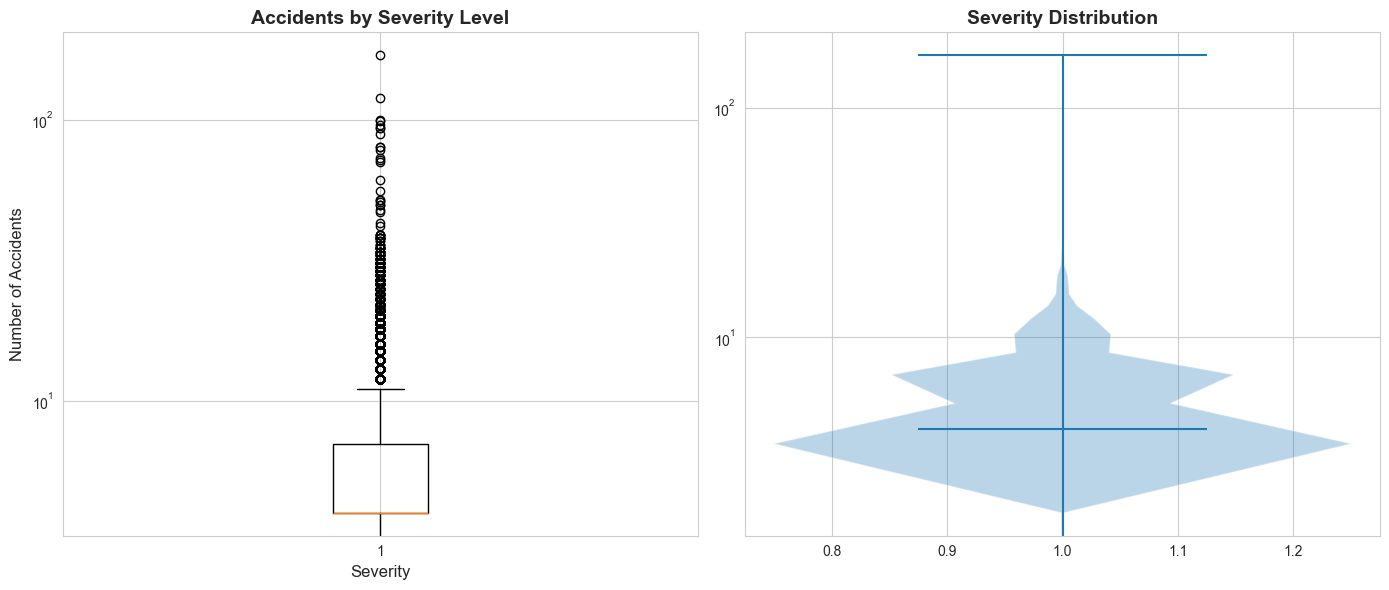

In [39]:
# Visualize severity distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
ax1.boxplot(joined_data['TOTAL_HARM'])
ax1.set_title('Accidents by Severity Level', fontsize=14, fontweight='bold')
ax1.semilogy()
ax1.set_xlabel('Severity', fontsize=12)
ax1.set_ylabel('Number of Accidents', fontsize=12)

# Violin plot
ax2.violinplot(joined_data['TOTAL_HARM'].astype(float), showmeans=False, showmedians=True)
ax2.set_title('Severity Distribution', fontsize=14, fontweight='bold')
ax2.semilogy()

plt.tight_layout()
plt.show()

## 7. Weather Conditions

In [40]:
# Top weather conditions
weather_counts = joined_data['WEATHERNAME'].value_counts().head(15)

print("Top 15 Weather Conditions:")
print("=" * 60)
for i, (weather, count) in enumerate(weather_counts.items(), 1):
    pct = (count / len(joined_data)) * 100
    print(f"{i:2d}. {weather:35s} {count:>8,}  ({pct:5.2f}%)")

Top 15 Weather Conditions:
 1. Clear                                 73,133  (69.61%)
 2. Cloudy                                14,668  (13.96%)
 3. Rain                                   8,016  ( 7.63%)
 4. Fog, Smog, Smoke                       1,115  ( 1.06%)
 5. Snow                                     945  ( 0.90%)
 6. Sleet or Hail                            157  ( 0.15%)
 7. Severe Crosswinds                        148  ( 0.14%)
 8. Other                                    105  ( 0.10%)
 9. Blowing Snow                              93  ( 0.09%)
10. Freezing Rain or Drizzle                  78  ( 0.07%)
11. Blowing Sand, Soil, Dirt                  28  ( 0.03%)
12. Reported as Unknown                        0  ( 0.00%)
13. Not Reported                               0  ( 0.00%)


## 8. Infrastructure Features
Probably going to drop this, it's kind of difficult to do manually and we can probably find more useful information with some model

In [41]:
# # Infrastructure boolean columns
# infrastructure_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
#                        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
#                        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# # Handle missing values first by filling with False (assuming missing means feature not present)
# df_clean = df[infrastructure_cols].fillna(False)

# infra_data = []
# for col in infrastructure_cols:
#     true_count = df_clean[col].sum()
#     false_count = len(df_clean) - true_count
#     missing_count = df[col].isnull().sum()
#     total_count = len(df)
    
#     true_percentage = (true_count / total_count) * 100
#     false_percentage = (false_count / total_count) * 100
#     missing_percentage = (missing_count / total_count) * 100
    
#     infra_data.append({
#         'Feature': col,
#         'True_Count': true_count,
#         'True_Percentage': true_percentage,
#         'False_Count': false_count,
#         'False_Percentage': false_percentage,
#         'Missing_Percentage': missing_percentage
#     })

# infra_stats = pd.DataFrame(infra_data).sort_values('True_Percentage', ascending=False)

# print("Infrastructure Feature Presence:")
# print("=" * 60)
# print(infra_stats.to_string(index=False))

In [42]:
# # Visualize infrastructure features
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.barh(infra_stats['Feature'], infra_stats['True_Percentage'], color='steelblue')
# ax.set_xlabel('Percentage of Accidents (%)', fontsize=12)
# ax.set_title('Presence of Infrastructure Features in Accidents', fontsize=14, fontweight='bold')
# ax.invert_yaxis()
# plt.tight_layout()
# plt.show()

## 9. Key Findings Summary

In [43]:
print("="*80)
print("KEY FINDINGS - FARS DATASET (2023)")
print("="*80)

print("\n📊 DATASET SIZE:")
print(f"   • Total records: {len(joined_data)}")
print(f"   • Features: {len(joined_data.columns)}")
print(f"   • Memory usage: {joined_data.memory_usage(deep=True).sum() / 1024**3:.2f} GB")

print("\n📍 GEOGRAPHIC COVERAGE:")
print(f"   • States: {joined_data['STATENAME'].nunique()}")
print(f"   • Top state: {joined_data['STATENAME'].value_counts().index[0]} ({joined_data['STATENAME'].value_counts().iloc[0]:,} accidents)")

# print("\n⚠️ SEVERITY DISTRIBUTION:")
# for sev in sorted(joined_data['TOTAL_HARM'].unique()):
#     count = (joined_data['TOTAL_HARM'] == sev).sum()
#     pct = (count / len(joined_data)) * 100
#     print(f"   • Level {sev}: {count:>10,} ({pct:>5.2f}%)")

print("\n🌤️ WEATHER CONDITIONS:")
print(f"   • Most common: {joined_data['WEATHERNAME'].value_counts().index[0]}")

# print("\n🚦 INFRASTRUCTURE:")
# print(f"   • Traffic signals: {(df['Traffic_Signal'].sum() / len(df) * 100):.1f}%")
# print(f"   • Crossings: {(df['Crossing'].sum() / len(df) * 100):.1f}%")
# print(f"   • Junctions: {(df['Junction'].sum() / len(df) * 100):.1f}%")

print("\n⚠️ DATA QUALITY:")
print(f"   • Columns with missing data: {len(missing)} / {len(joined_data.columns)}")
print(f"   • Overall completeness: {(1 - joined_data.isnull().sum().sum() / (len(joined_data) * len(joined_data.columns))) * 100:.2f}%")

print("\n" + "="*80)

KEY FINDINGS - FARS DATASET (2023)

📊 DATASET SIZE:
   • Total records: 105060
   • Features: 42
   • Memory usage: 0.09 GB

📍 GEOGRAPHIC COVERAGE:
   • States: 51
   • Top state: California (10,639 accidents)

🌤️ WEATHER CONDITIONS:
   • Most common: Clear

⚠️ DATA QUALITY:
   • Columns with missing data: 17 / 42
   • Overall completeness: 97.12%



## 12. Save preprocessed Dataset with Modified Data Types and New Features

Lets save the dataset with modified data types and new features for quick testing in subsequent notebooks

In [54]:
output_full_path = Config.FARS_CLEANED_DIR / "fars.csv"
joined_data.to_csv(output_full_path, index=False)

print("\nDataset saved with the following details:")
print(f"✓ Cleaned dataset saved to: {output_full_path}")


Dataset saved with the following details:
✓ Cleaned dataset saved to: /Users/amadeusrieck/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studium/Masterstudium/ERASMUS/Data_Science_Found/US_accidents_project/data/processed/fars/fars.csv
